## Project 2: Revenue Predictions

Let us assume you own an ice-cream business and you want to creat a model to predict daily revenue in dollars based on temperature (degC). You decided to build a simple ANN to solve this problem

## Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('SalesData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Visualize Dataset

/home/aditya/miniconda3/envs/py37_TF/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


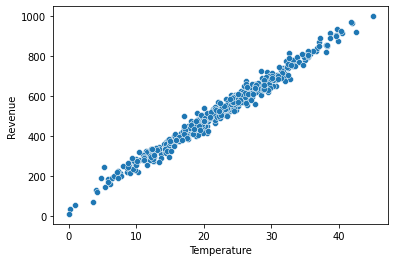

In [5]:
sns.scatterplot(df['Temperature'],  df['Revenue']);

## Split the dataset into train and test sets

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df['Temperature'], df['Revenue'], test_size=0.2)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Training whole dataset
X_train = df['Temperature']
y_train = df['Revenue']

## Build and Train the model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['mse'])

2022-07-06 15:36:21.557751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 15:36:21.563600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 15:36:21.564178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 15:36:21.564917: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 970us/step - loss: 249377.2969 - mse: 249377.2969
Epoch 2/1000
16/16 [==============================] - 0s 901us/step - loss: 212546.4219 - mse: 212546.4219
Epoch 3/1000
16/16 [==============================] - 0s 886us/step - loss: 179123.6094 - mse: 179123.6094
Epoch 4/1000
16/16 [==============================] - 0s 955us/step - loss: 150187.9688 - mse: 150187.9688
Epoch 5/1000
16/16 [==============================] - 0s 949us/step - loss: 124942.1719 - mse: 124942.1719
Epoch 6/1000
16/16 [==============================] - 0s 913us/step - loss: 102841.1250 - mse: 102841.1250
Epoch 7/1000
16/16 [==============================] - 0s 946us/step - loss: 84031.4531 - mse: 84031.4531
Epoch 8/1000
16/16 [==============================] - 0s 898us/step - loss: 68355.8984 - mse: 68355.8984
Epoch 9/1000
16/16 [==============================] - 0s 964us/step - loss: 54845.9609 - mse: 54845.9609
Epoch 10/1000
16/16 [======================

# Evaluate the model

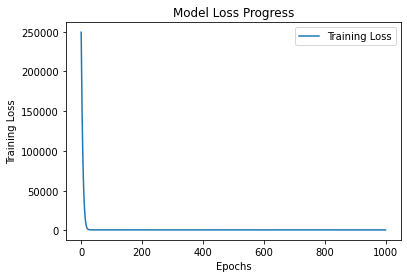

In [10]:
plt.plot(model_hist.history['loss'])
plt.title('Model Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [11]:
model.get_weights()

[array([[21.377716]], dtype=float32), array([44.798096], dtype=float32)]

In [12]:
# Predicting sing the trained model
Temp = 40
Revenue =model.predict([Temp])
Revenue

array([[899.90674]], dtype=float32)

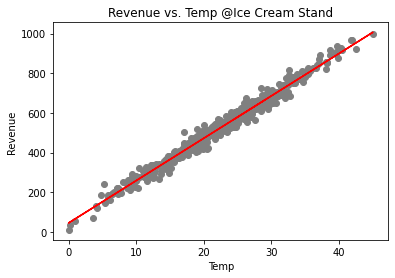

In [13]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel('Revenue')
plt.xlabel('Temp')
plt.title('Revenue vs. Temp @Ice Cream Stand');